## Overflow CNN Workshop MNIST demo

In [1]:
from tensorflow import keras
print('keras: ', keras.__version__)

#optional (comment out for use)
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:95% !important; }</style>"))

keras:  2.2.4-tf


### Step 1: Building the model

Our DNN model from Day 1 of the bootcamp had a pretty high accuracy. Now we want to find out if using CNNs will do better.

What we are going to code is a basic convnet architecture. It's a stack of `Conv2D` and `MaxPooling2D` layers. Input shape for this will be 28 by 28 by 1 since the image is grayscale (i.e. only has a depth of 1).

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

#first argument: number of nodes
#second argument: filter size (a.k.a. kernel size)
model.add(layers.Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#tabular summary of number of layers and nodes
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


We will need to feed our last layer into a flatten layer and thereafter into dense layer(s) to make the prediction (do the classification) because CNNs themselves cannot make the prediction.

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

[Pydot API](https://github.com/pydot/pydot) makes a nice illustration of the model architecture.

In anaconda prompt type `conda install pydot`.

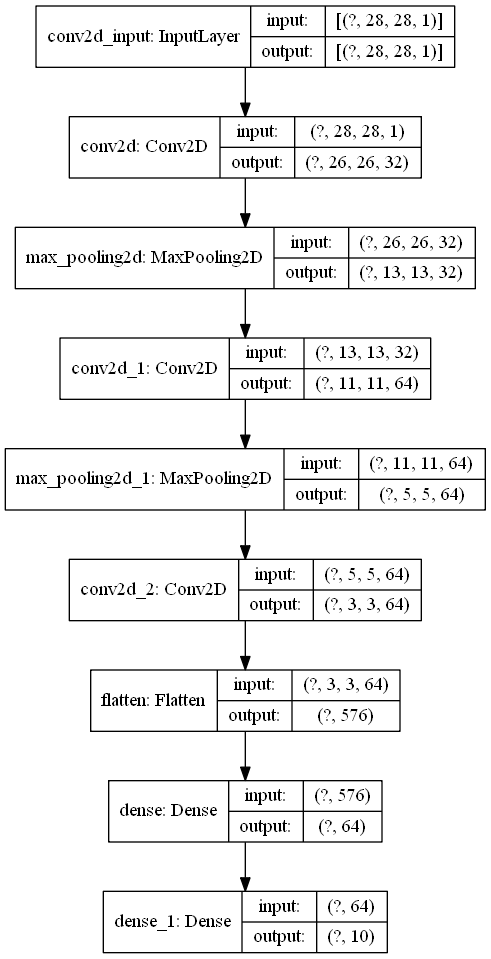

In [4]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True, to_file='model.png')

### Step 2: Data Preparation

Our dataset consist of images that may not be of the same pixel dimension so we need to perform some sort of preparation before fitting the model.

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#converting the images in the dataset to the specified input dimension
train_images = train_images.reshape((60000, 28, 28, 1))
# make the pixel values between 0 and 1
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

#converts integers to binary matrix
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Step 3: Fitting the model

In [6]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc']) # metrics may be ['accuracy'] for some versions of tf

history = model.fit(train_images, train_labels, epochs=10, batch_size=64)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.1655 - acc: 0.9492
Epoch 2/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0461 - acc: 0.9859
Epoch 3/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0317 - acc: 0.9901
Epoch 4/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0237 - acc: 0.9928
Epoch 5/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0187 - acc: 0.9936
Epoch 6/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0154 - acc: 0.9955
Epoch 7/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0117 - acc: 0.9962
Epoch 8/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0108 - acc: 0.9967
Epoch 9/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0080 - acc: 0.9976
Epoch 10/10
60000/60000 [=============================

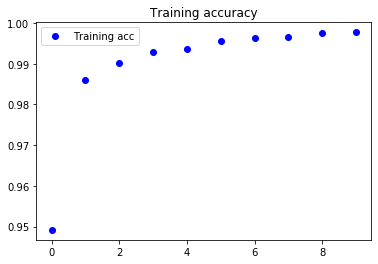

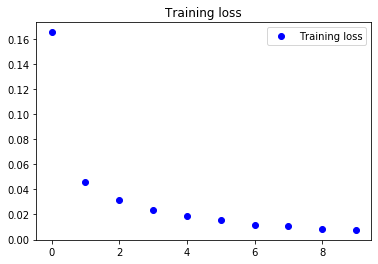

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

### Step 4: Evaluation on test data

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/10000 - 1s - loss: 0.0404 - acc: 0.9919
